1. SVM尝试寻找一个最优的决策边界
2. 最大化margin(2d)

### 距离推导

![](http://p9tybni1b.bkt.clouddn.com/%E7%82%B9%E5%88%B0%E7%9B%B4%E7%BA%BF%E8%B7%9D%E7%A6%BB%28%E9%9D%A2%E7%A7%AF%E6%B3%95%29.png)

### Hard Margin SVM

![](http://p9tybni1b.bkt.clouddn.com/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA3.jpg)

### Soft Margin SVM

![](http://p9tybni1b.bkt.clouddn.com/softMarginSvm.png)

### scikit-learn中的SVM
和knn一样，要做数据标准化处理

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
def plot_decision_boundary(model,axis):
    """决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
#         np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100).reshape(-1,1))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

In [32]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0 决策中边界
    # w0*x0 + w1*x1 + b = 1 决策上边界
    # w0*x0 + w1*x1 + b = -1 决策下边界
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

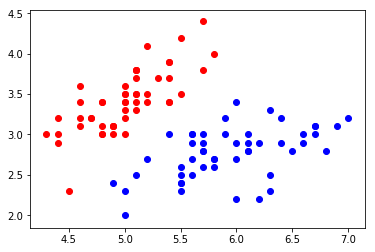

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

X = X[Y<2,:2]
Y = Y[Y<2]

plt.scatter(X[Y==0,0],X[Y==0,1],color='r')
plt.scatter(X[Y==1,0],X[Y==1,1],color='b')
plt.show()

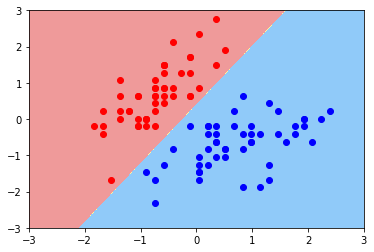

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

stds = StandardScaler()
stds.fit(X)
X_std = stds.transform(X)

svc = LinearSVC(C=1e9) # C是正则化系数,1e9相当于hard margin svm
svc.fit(X_std,Y)

# 绘制
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_std[Y==0,0],X_std[Y==0,1],color='r')
plt.scatter(X_std[Y==1,0],X_std[Y==1,1],color='b')
plt.show()

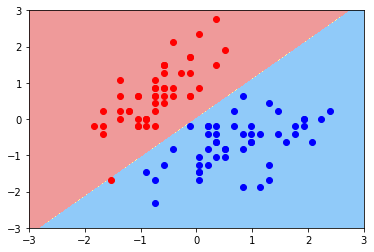

In [41]:
stds = StandardScaler()
stds.fit(X)
X_std = stds.transform(X)

svc = LinearSVC(C=0.01) # C是正则化系数,soft margin svm
svc.fit(X_std,Y)

# 绘制
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_std[Y==0,0],X_std[Y==0,1],color='r')
plt.scatter(X_std[Y==1,0],X_std[Y==1,1],color='b')
plt.show()

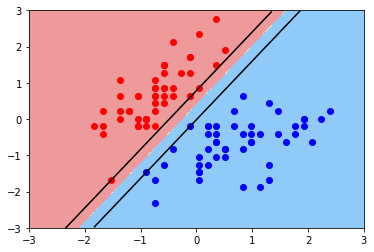

In [40]:
stds = StandardScaler()
stds.fit(X)
X_std = stds.transform(X)

svc = LinearSVC(C=1e9) # C是正则化系数,hard margin svm
svc.fit(X_std,Y)

# 绘制
plot_svc_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_std[Y==0,0],X_std[Y==0,1],color='r')
plt.scatter(X_std[Y==1,0],X_std[Y==1,1],color='b')
plt.show()

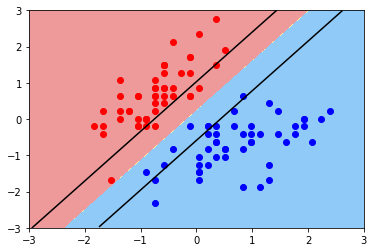

In [43]:
stds = StandardScaler()
stds.fit(X)
X_std = stds.transform(X)

svc = LinearSVC(C=1) # C是正则化系数,soft margin svm
svc.fit(X_std,Y)

# 绘制
plot_svc_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_std[Y==0,0],X_std[Y==0,1],color='r')
plt.scatter(X_std[Y==1,0],X_std[Y==1,1],color='b')
plt.show()

### SVM中使用多项式特征

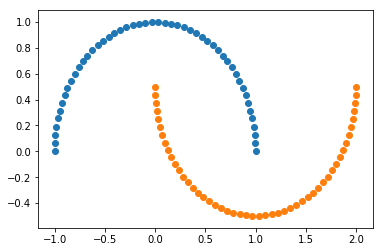

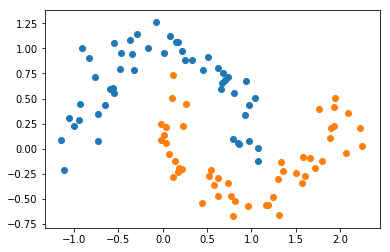

In [85]:
import sklearn.datasets

# 原始数据
X,y = datasets.make_moons()
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

# 噪音数据
X,y = datasets.make_moons(noise=0.15)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
X = X[:,:2]

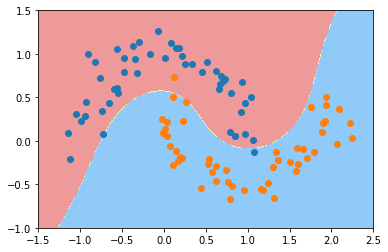

In [91]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用多项式核函数的SVM

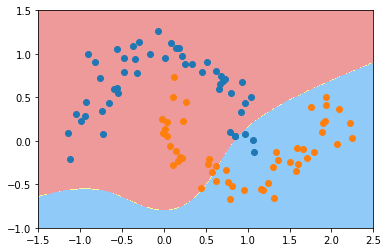

In [93]:
from sklearn.svm import SVC

svc = SVC(degree=3,kernel="poly")
svc.fit(X,y)
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 什么是核函数